In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/Fake.csv
/kaggle/input/fake-and-real-news-dataset/True.csv


In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,HashingVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier

sns.set(style="darkgrid")


In [3]:
df_true = pd.read_csv('../input/fake-and-real-news-dataset/True.csv')
df_false = pd.read_csv('../input/fake-and-real-news-dataset/Fake.csv')

In [4]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
df_false.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
df_true['label'] = 1
df_false['label'] =0
df = pd.concat([df_true,df_false])

In [7]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
df.shape

(44898, 5)

In [9]:
df.iloc[5]

title      White House, Congress prepare for talks on spe...
text       WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...
subject                                         politicsNews
date                                      December 29, 2017 
label                                                      1
Name: 5, dtype: object

In [10]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [11]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [13]:
df['label'].value_counts()

0    23481
1    21417
Name: label, dtype: int64

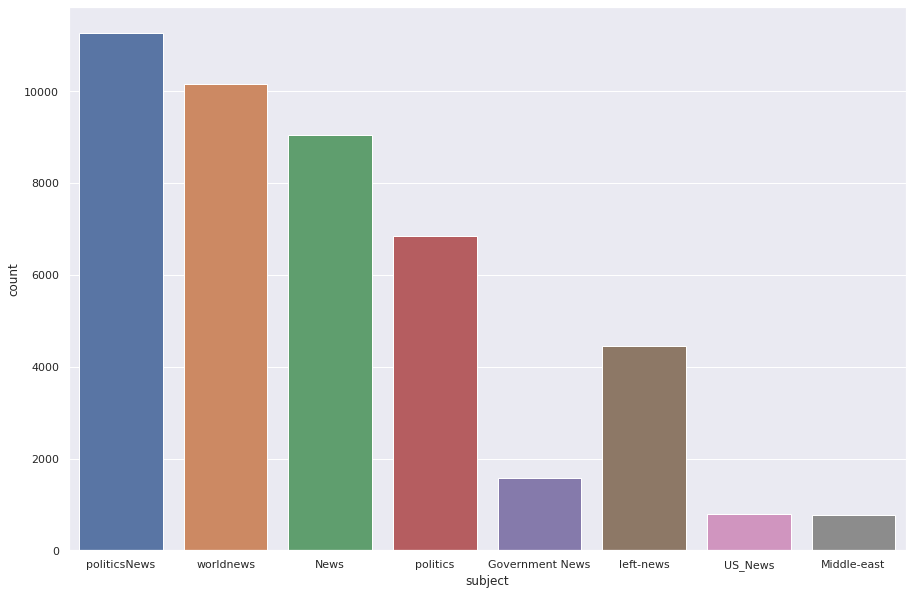

In [14]:
plt.figure(figsize =(15,10))
sns.countplot(df['subject'])

In [15]:
wordcloud1 = WordCloud().generate(' '.join(df['text']))

(-0.5, 399.5, 199.5, -0.5)

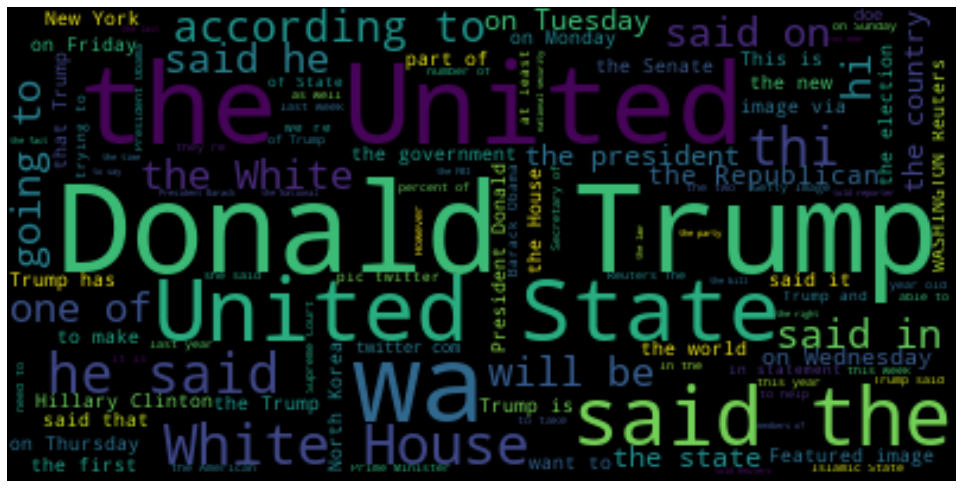

In [16]:
text=list(df['text'].dropna().unique())
fig, (ax2) = plt.subplots(1,1,figsize=[17, 10])
wordcloud2 = WordCloud().generate(" ".join(text))
ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')

In [17]:
texts = df.copy()
texts.head(2)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1


In [18]:
texts.iloc[5]

title      White House, Congress prepare for talks on spe...
text       WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...
subject                                         politicsNews
date                                      December 29, 2017 
label                                                      1
Name: 5, dtype: object

In [19]:
texts['title'].iloc[5]

'White House, Congress prepare for talks on spending, immigration'

In [20]:
ps=PorterStemmer()
corpus=[]
for i in range(len(texts)):
    review=re.sub('[^a-zA-Z]',' ',texts['title'].iloc[i])
    review=review.lower()
    review=review.split()
    
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [21]:
corpus[:5]

['u budget fight loom republican flip fiscal script',
 'u militari accept transgend recruit monday pentagon',
 'senior u republican senat let mr mueller job',
 'fbi russia probe help australian diplomat tip nyt',
 'trump want postal servic charg much amazon shipment']

In [22]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [23]:

y=texts['label']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [25]:
cv.get_feature_names()[:10]

['abadi',
 'abandon',
 'abba',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort']

In [26]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [27]:
countdf=pd.DataFrame(X_train,columns=cv.get_feature_names())
countdf.head()

,abadi,abandon,abba,abc,abc news,abe,abedin,abil,abl,abort,...,zero,zika,zika fund,zimbabw,zimbabw mnangagwa,zimbabw mugab,zone,zor,zuckerberg,zuma
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
classifier = MultinomialNB()

In [30]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score=metrics.accuracy_score(y_test,pred)
print("Accuracy: %0.3f"%score)

Accuracy: 0.930


Confusion matrix, without normalization


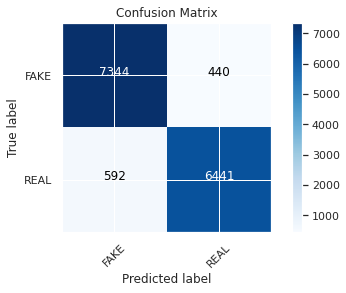

In [31]:
import itertools
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

In [32]:
linear_clf = PassiveAggressiveClassifier()

accuracy: 0.929
Confusion matrix, without normalization


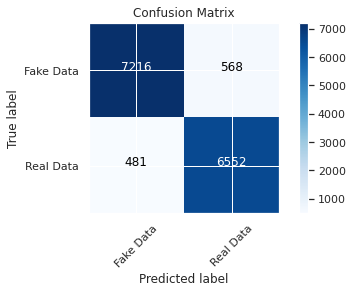

In [33]:
linear_clf.fit(X_train,y_train)
pred=linear_clf.predict(X_test)
score= metrics.accuracy_score(y_test,pred)
print('accuracy: %0.3f'%score)
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['Fake Data','Real Data'])

In [34]:
classifier = MultinomialNB(alpha=0.1)

In [35]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.9300803131538098
Alpha: 0.1, Score : 0.9310926638320848
Alpha: 0.2, Score : 0.9313626240129581
Alpha: 0.30000000000000004, Score : 0.9312276439225214
Alpha: 0.4, Score : 0.9312276439225214
Alpha: 0.5, Score : 0.9312951339677398
Alpha: 0.6000000000000001, Score : 0.9312276439225214
Alpha: 0.7000000000000001, Score : 0.9308901936964298
Alpha: 0.8, Score : 0.9307552136059931
Alpha: 0.9, Score : 0.9305527434703381


In [36]:
feature_names = cv.get_feature_names()

In [37]:
classifier.coef_[0]

array([ -9.09530087,  -9.25065131,  -9.09530087, ...,  -8.43506343,
       -10.66247897,  -8.2645837 ])